In [132]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [144]:
TRAIN_FILE = 'Apple_Stock_Price_27years.csv'
TEST_FILE = 'Google_Stock_June_2017.csv'

In [145]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
#Importing the dataset
def read_data(filename):
    dataset = pd.read_csv(filename)
    dataset = dataset.iloc[:,1:2].values
    dataset = sc.fit_transform(dataset)
    return dataset

In [146]:
def prepare_data(data):
    # Reshaping
    data = np.reshape(data, (len(data), 1, 1))
    return data

In [147]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing

# Importing the training set
#training_set = read_data('Google_Stock_Price_Train.csv')
training_set = read_data(TRAIN_FILE)

# Getting the inputs and the ouputs
X_train = training_set[:-1]
y_train = training_set[1:]

# Reshaping
X_train = prepare_data(X_train)

In [148]:
# Part 2 - Building the RNN

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 8, activation = 'tanh', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
9225/9225 [==============================] - 13s - loss: 0.0528    
Epoch 2/200
9225/9225 [==============================] - 2s - loss: 0.0199     
Epoch 3/200
9225/9225 [==============================] - 2s - loss: 8.3167e-04     
Epoch 4/200
9225/9225 [==============================] - 2s - loss: 4.6889e-05     
Epoch 5/200
9225/9225 [==============================] - 2s - loss: 4.3246e-05     
Epoch 6/200
9225/9225 [==============================] - 2s - loss: 3.9705e-05     
Epoch 7/200
9225/9225 [==============================] - 2s - loss: 3.6425e-05     
Epoch 8/200
9225/9225 [==============================] - 2s - loss: 3.3181e-05     
Epoch 9/200
9225/9225 [==============================] - 2s - loss: 3.0661e-05     
Epoch 10/200
9225/9225 [==============================] - 2s - loss: 2.8253e-05     
Epoch 11/200
9225/9225 [==============================] - 2s - loss: 2.6707e-05     
Epoch 12/200
9225/9225 [==============================] - 2s - loss: 2.5654e-05   

In [167]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
inputs = read_data(TEST_FILE)
#outputs = inputs[1:]
#inputs = training_set[:-1]
#outputs = training_set[1:]

#ts = training_set
#inp = ts[:100]

#for i in range(101, len(training_set)):
#    pred = regressor.predict(prepare_data(inp))
#    ts[i]=pred[-1]
#    inp = ts[:i]
#    print(len(inp), len(pred), inp[-1])
    
# Getting the predicted stock price of 2017
#input_stock_price = sc.inverse_transform(inputs)
real_stock_price = sc.inverse_transform(inputs)
move = real_stock_price[1:]-real_stock_price[:-1]
#inputs = sc.transform(inputs)
inputs = prepare_data(inputs)
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [168]:
predicted_tanh_200 = predicted_stock_price
pred_move = predicted_stock_price - input_stock_price
#print(predicted_stock_price, sc)
#print(pred_move, len(pred_move))

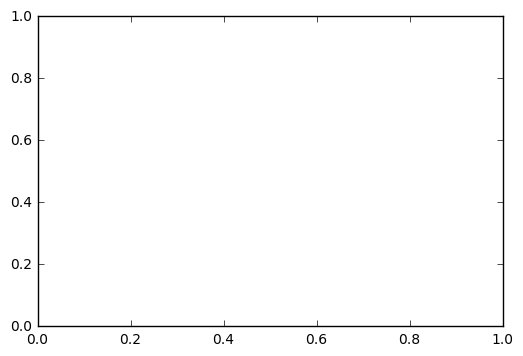

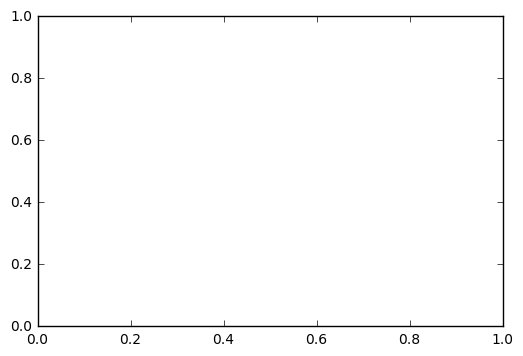

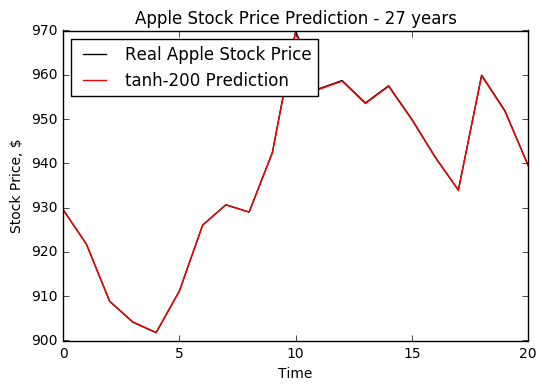

In [169]:
if len(real_stock_price) != len(predicted_stock_price):
    print('Error: not equal lengths')
    print(len(real_stock_price), len(predicted_stock_price))
    
# Visualising the results
xreal = range(len(real_stock_price))
xpred = range(1, len(predicted_stock_price)+1)
fig = plt.figure()
#plt.savefig('lstm_activations.png')
plt.plot(xreal, real_stock_price, color = 'black', label = 'Real Apple Stock Price')
#plt.plot(xpred, predicted_az, color = 'blue', label = 'Predicted A-Z (sigmoid)')
#plt.plot(xpred, predicted_relu, color = 'magenta', label = 'Predicted relu')
#plt.plot(xreal, predicted_tanh_3, color = 'cyan', label = 'Predicted tanh')
#plt.plot(xreal, predicted_tanh_100, color = 'magenta', label = 'tanh-100 Prediction')
#plt.plot(xreal, predicted_tanh_7, color = 'green', label = 'tanh-7')
#plt.plot(xreal, predicted_tanh_10, color = 'blue', label = 'tanh-10')
plt.plot(xreal, predicted_tanh_200, color = 'red', label = 'tanh-200 Prediction')
#plt.plot(xpred, predicted_softmax, color = 'green', label = 'Predicted softmax')
plt.title('Apple Stock Price Prediction - 27 years')
plt.xlabel('Time')
plt.ylabel('Stock Price, $')
plt.legend(loc='upper left')
plt.show()
fig.savefig('lstm_tanh_predictions.png')

In [170]:
#print(pred_move)
print(len(move), len(pred_move))
# Visualising the results
fig = plt.figure()
#plt.plot(move)
#plt.plot(pred_move)
plt.scatter(move, pred_move, color = 'blue', marker = '+', label = 'Predicted move')
#plt.scatter(inputs, sc.transform(predicted_tanh_100), color = 'black', marker = '+', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_10), color = 'blue', marker = 'o', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_7), color = 'green', marker = '3', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_5), color = 'magenta', marker = '8', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_3), color = 'cyan', marker = '^', label = 'Real Google Stock Price')
#plt.scatter(inputs, ts[:len(inputs)], color = 'yellow', marker = 'o', label = 'Real Google Stock Price')
plt.title('Apple Stock Price Prediction - 27 years')
plt.xlabel('Stock move, $')
plt.ylabel('Predicted move, $')
#plt.legend(loc='upper left')
plt.show()
fig.savefig('moves.png')

20 21


ValueError: x and y must be the same size

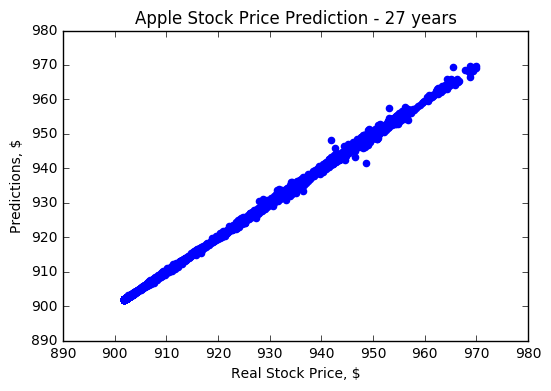

In [153]:
# Visualising the results
xreal = range(len(real_stock_price))
xpred = range(1, len(predicted_stock_price)+1)
fig = plt.figure()
#plt.scatter(real_stock_price, predicted_tanh_100, color = 'red', marker = '+', label = 'Real Google Stock Price')
plt.scatter(real_stock_price, predicted_tanh_200, color = 'blue', marker = 'o', label = 'Real Google Stock Price')
#plt.scatter(real_stock_price, predicted_tanh_7, color = 'green', marker = '3', label = 'Real Google Stock Price')
#plt.scatter(real_stock_price, predicted_tanh_5, color = 'magenta', marker = '8', label = 'Real Google Stock Price')
#plt.scatter(real_stock_price, predicted_tanh_3, color = 'black', marker = '+', label = 'Real Google Stock Price')
plt.title('Apple Stock Price Prediction - 27 years')
plt.xlabel('Real Stock Price, $')
plt.ylabel('Predictions, $')
#plt.legend(loc='upper left')
plt.show()
fig.savefig('lstm_apple_corr.png')

In [55]:
real_price_June = real_stock_price
print(len(real_stock_price))

1257


In [28]:
real_price_June, predicted_softmax

(array([[ 929.54],
        [ 921.77],
        [ 908.85],
        [ 904.12],
        [ 901.76],
        [ 911.16],
        [ 926.05],
        [ 930.65],
        [ 929.  ],
        [ 942.46],
        [ 969.9 ],
        [ 956.83],
        [ 958.7 ],
        [ 953.64],
        [ 957.52],
        [ 949.96],
        [ 941.45],
        [ 933.97],
        [ 959.92],
        [ 951.91],
        [ 939.56]]), array([[ 799.23596191],
        [ 798.90539551],
        [ 798.32830811],
        [ 798.10784912],
        [ 797.99591064],
        [ 798.43414307],
        [ 799.08892822],
        [ 799.28222656],
        [ 799.21331787],
        [ 799.7611084 ],
        [ 800.78979492],
        [ 800.31341553],
        [ 800.38299561],
        [ 800.19348145],
        [ 800.3392334 ],
        [ 800.05334473],
        [ 799.72113037],
        [ 799.41943359],
        [ 800.42816162],
        [ 800.12792969],
        [ 799.64581299]], dtype=float32))